## Parte 3 - Laboratorio 3 - Modelación y Simulación

Stefano Aragoni, Carol Arévalo, Luis Santos, Diego Perdomo

------------

### Task 1

Genere muestras aleatorias a partir de una distribución geométrica utilizando el método de transformación inversa.
1. Defina una distribución geométrica objetivo con el parámetro p=0.3
2. Implemente el método de transformación inversa para generar muestras aleatorias a partir de la
distribución geométrica.
3. Genere una muestra aleatoria de tamaño 1000 a partir de la distribución geométrica.
4. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución geométrica.

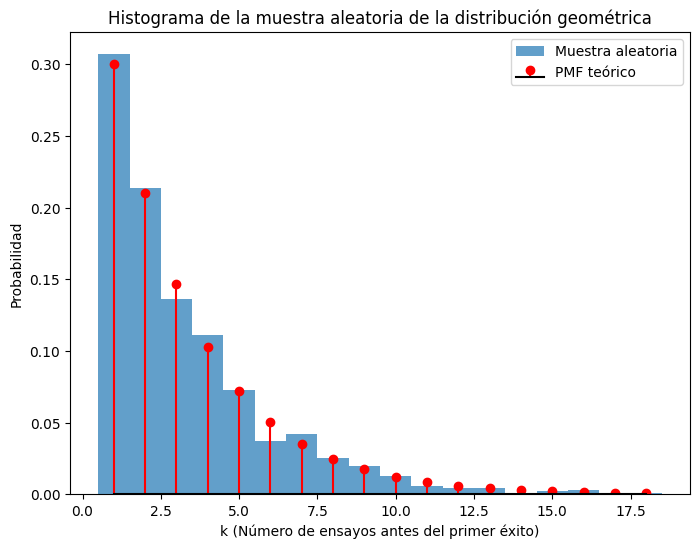

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def geometric_pmf(k, p):
    return (1 - p)**(k-1) * p

def geometric_cdf(k, p):
    return 1 - (1 - p)**k

def inverse_transform_sampling_geometric(size, p):
    u = np.random.rand(size)
    x = np.floor(np.log(1 - u) / np.log(1 - p)) + 1
    return x.astype(int)

p = 0.3

sample_size = 1000
sample = inverse_transform_sampling_geometric(sample_size, p)

k_values = np.arange(1, np.max(sample) + 1)
pmf_values = geometric_pmf(k_values, p)

plt.figure(figsize=(8, 6))
plt.hist(sample, bins=np.arange(0.5, np.max(sample) + 1.5, 1), density=True, alpha=0.7, label='Muestra aleatoria')
plt.stem(k_values, pmf_values, linefmt='r-', markerfmt='ro', basefmt='k-', label='PMF teórico')
plt.xlabel('k (Número de ensayos antes del primer éxito)')
plt.ylabel('Probabilidad')
plt.title('Histograma de la muestra aleatoria de la distribución geométrica')
plt.legend()
plt.show()


En este caso, se puede confirmar que la muestra aleatoria sigue correctamente el patrón visto del PMF teórico de una distribución geométrica. Esto debido a que casi tienen un funcionamiento idéntico. 

------------------------------------------------------------------------
### Task 2

Genere muestras aleatorias a partir de una distribución de Poisson utilizando el método de rechazo.
1. Defina una distribución de Poisson objetivo con el parámetro λ = 3.
2. Elija una distribución de propuesta que sea fácil de muestrear, como una distribución uniforme o
exponencial.
3. Calcule la constante C para acotar la relación entre el PMF objetivo y el PMF propuesto.
4. Implemente el método de rechazo para generar muestras aleatorias a partir de la distribución de Poisson.
5. Genere una muestra aleatoria de tamaño 1000 a partir de la distribución de Poisson.
6. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución de Poisson.

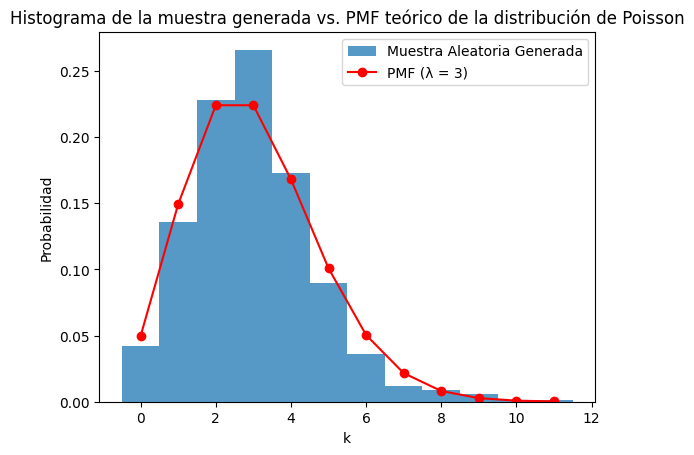

In [13]:
def poisson_pmf(k, lambdas):
    return np.exp(-lambdas) * (lambdas ** k) / np.math.factorial(k)

def exponencial_pdf(x):
    return np.exp(-x)

def constante_c(lambdas):
    max_ratio = max(poisson_pmf(k, lambdas) / exponencial_pdf(k) for k in range(30))
    return max_ratio

def metodo_rechazo(n_samples, lambdas):
    samples = []

    C = constante_c(lambdas)

    for _ in range(n_samples):
        accepted = False
        while not accepted:
            # Muestra de la distribución exponencial
            x = np.random.exponential(scale=1)

            # Uniforme para aceptar o rechazar
            u = np.random.uniform()

            probabilidad_aceptar = poisson_pmf(int(x), lambdas) / (C * exponencial_pdf(x))

            if u <= probabilidad_aceptar:
                samples.append(int(x))
                accepted = True

    return samples

random_sample = metodo_rechazo(n_samples=1000, lambdas=3)

plt.hist(random_sample, bins=np.arange(-0.5, max(random_sample) + 1.5, 1), density=True, alpha=0.75, label='Muestra Aleatoria Generada')

x_values = np.arange(0, max(random_sample) + 1)
pmf_values = [poisson_pmf(k, 3) for k in x_values]

plt.plot(x_values, pmf_values, 'ro-', label='PMF (λ = 3)')
plt.xlabel('k')
plt.ylabel('Probabilidad')
plt.title('Histograma de la muestra generada vs. PMF teórico de la distribución de Poisson')
plt.legend()
plt.show()

En este caso, se puede confirmar que la muestra generada sigue el comportamiento del PMF teórico de la distribución de Poisson. Esto exceptuando un únnico punto en K=3, donde la muestra tienen una probabilidad levemente mayor.

--------

### Task 3

Genere muestras aleatorias a partir de una distribución de probabilidad discreta personalizada mediante el método
de aceptación-rechazo.
1. Defina una distribución de probabilidad discreta objetivo con valores y probabilidades especificados.
    - Función = (x**2) / 55
2. Elija una distribución de propuesta con un soporte mayor que cubra el soporte de la distribución de destino.
    - N.B: El "soporte" de una variable aleatoria o distribución de probabilidad se refiere al conjunto de
valores para los cuales la variable aleatoria tiene una probabilidad distinta de cero. En otras
palabras, es el rango de valores donde la distribución de probabilidad es positiva.
3. Calcule la constante C para acotar la relación entre el PMF objetivo y el PMF propuesto.
4. Implemente el método de aceptación-rechazo para generar muestras aleatorias a partir de la distribución
discreta personalizada.
5. Genere una muestra aleatoria de tamaño 1000 a partir de la distribución personalizada.
6. Trace un histograma de la muestra generada y compárelo con el PMF objetivo

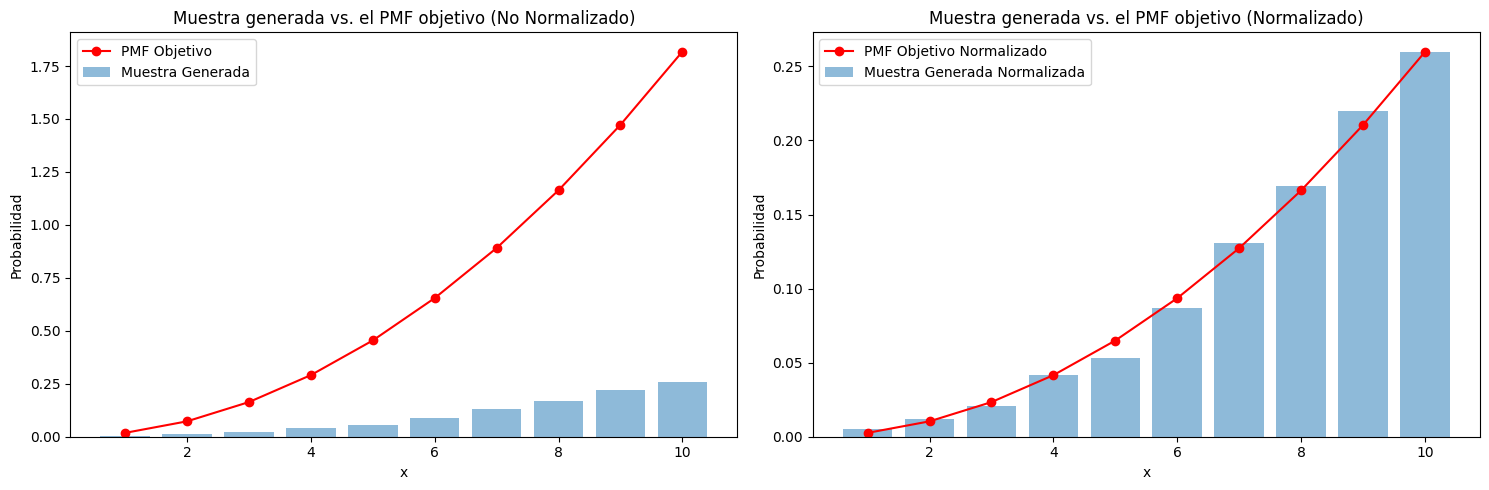

In [27]:
def targetPmf(x):
    return (x ** 2) / 55

def proposalPmf(x):
    return 1 / 15  

def constante_c(x):
    max_ratio = max(targetPmf(x) / proposalPmf(x) for x in range(1, 30))
    return max_ratio

def acceptanceRejectionSampling(size):
    samples = []
    while len(samples) < size:
        x = np.random.randint(1, 11)
        u = np.random.uniform(0, 1)
        if u <= targetPmf(x) / (constante_c(x) * proposalPmf(x)):
            samples.append(x)
    return samples

sampleSize = 1000
randomSample = acceptanceRejectionSampling(sampleSize)

xValues = np.arange(1, 11)
targetPmfValues = np.array([targetPmf(x) for x in xValues])
normalizedTargetPmfValues = targetPmfValues / np.sum(targetPmfValues)
histogramValues, _ = np.histogram(randomSample, bins=np.arange(1, 12), density=True)


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(xValues, histogramValues, alpha=0.5, label='Muestra Generada')
plt.plot(xValues, targetPmfValues, 'ro-', label='PMF Objetivo')
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.legend()
plt.title('Muestra generada vs. el PMF objetivo (No Normalizado)')

plt.subplot(1, 2, 2)
plt.bar(xValues, histogramValues / np.sum(histogramValues), alpha=0.5, label='Muestra Generada Normalizada')
plt.plot(xValues, normalizedTargetPmfValues, 'ro-', label='PMF Objetivo Normalizado')
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.legend()
plt.title('Muestra generada vs. el PMF objetivo (Normalizado)')

plt.tight_layout()
plt.show()


Se confirma que la muestra generada sigue el patrón del PMF objetivo.

Sin embargo, en el lado izquierdo (donde el PMF Objetivo no fue normalzado), se puede observar que la muestra es de menor magnitud que el PMF objetivo. A pesar de esto, ambos tienen el mismo patrón exponencial, pero crecen de manera diferente.

 Sin embargo, cuando se normaliza el PMF objetivo, se puede observar como estos siguen un patrón idéntico. Ambos crecen de manera exponencial y al mismo ritmo. 